In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Evaluation Metrics

Pada kasus Ecommerce churn prediction ini, kami menggunakan **Recall** sebagai metrics utama karena tujuan utama dari prediksi model ini adalah mencegah customer untuk churn jika ia terdeteksi churn, maka dari itu dengan metrics recall prediksi kami dapat berfokus sebanyak-banyaknya customer yang berpotensi untuk churn untuk mencegah mereka untuk churn.

Customer yang diprediksi akan churn akan diberikan kupon atau penawaran spesial agar mereka tidak churn, namun karena dataset ini mempunyai target yang imbalance, untuk mencegah memberikan terlalu banyak kupon kepada customer yang tidak berpotensi churn maka kami akan memakai metrics **ROC_AUC** sebagai tambahan.

# Read Dataset

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 40F4-F4CD

 Directory of C:\Users\DELL\Documents\Bryan\Rakamin\Intellegend-Final-Project

20/02/2022  23:49    <DIR>          .
20/02/2022  23:49    <DIR>          ..
14/02/2022  00:27                66 .gitattributes
17/02/2022  17:28    <DIR>          .ipynb_checkpoints
18/02/2022  22:31    <DIR>          catboost_info
17/02/2022  17:18            95.545 df_test.csv
17/02/2022  17:18           365.331 df_train.csv
26/01/2021  10:20           555.610 E Commerce Dataset.xlsx
14/02/2022  01:55    <DIR>          Guidance
18/02/2022  23:28         7.662.688 Laporan Final Project - Ghoib CC.pptx
20/02/2022  23:43         7.692.739 Laporan Final Project - Stage 3.pptx
27/01/2022  18:35         7.844.126 Pandas Profiling.html
20/02/2022  23:47             4.692 README.md
06/02/2022  19:21         1.928.073 Stage 0 - Notulen Mentoring.pptx
17/02/2022  17:25             3.892 Stage 0 (Problem Definition).ipynb
14/02/2022  01:55    <DIR>

In [5]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [6]:
df_train.head()

,Tenure,CityTier,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.059487,1,0.355402,1,0.273019,0.460876,0
1,0.546668,1,0.384142,1,0.509468,0.510200,0
2,0.000000,1,0.247171,0,0.200478,0.401028,0
3,0.389387,1,0.200539,1,0.000000,0.360073,0
4,0.235714,1,0.323493,1,0.273019,0.456045,0


In [7]:
X_train = df_train.drop('Churn', axis = 1)
y_train = df_train['Churn']
X_test = df_test.drop('Churn', axis = 1)
y_test = df_test['Churn']

# Baseline Model

In [8]:
X_train

,Tenure,CityTier,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount
0,0.059487,1,0.355402,1,0.273019,0.460876
1,0.546668,1,0.384142,1,0.509468,0.510200
2,0.000000,1,0.247171,0,0.200478,0.401028
3,0.389387,1,0.200539,1,0.000000,0.360073
4,0.235714,1,0.323493,1,0.273019,0.456045
...,...,...,...,...,...,...
4499,0.059487,1,0.621352,0,0.273019,0.454537
4500,0.412954,3,0.456043,0,0.273019,0.695283
4501,0.336746,1,0.323493,0,0.273019,0.502723
4502,0.059487,1,0.703346,0,0.273019,0.504846


In [9]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4499    0
4500    1
4501    0
4502    0
4503    1
Name: Churn, Length: 4504, dtype: int64

In [10]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [11]:
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.3837837837837838
ROC_AUC Score = 0.6796708504466209


In [12]:
LRP = { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    }

In [13]:
LR = LogisticRegression()
GSCV = GridSearchCV(LR, LRP, cv = 5, n_jobs = -1, verbose = 0, scoring = 'recall')
GSCV.fit(X_train, y_train)
y_pred = GSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Recall Score = 0.40540540540540543
ROC_AUC Score = 0.6878249131171554


In [14]:
y_pred_train = GSCV.predict(X_train)
print(f'Recall Score = {recall_score(y_train, y_pred_train)}')
print(f'ROC_AUC Score = {roc_auc_score(y_train, y_pred_train)}')

Recall Score = 0.40104849279161203
ROC_AUC Score = 0.6827482506727374


Jika dilihat dari model baseline, model tersebut adalah model yang undertrain. karena itu kita perlu menaikkan variance dari model dengan menggunakan model-model boosting. Namun model-model lain akan tetap dicoba untuk menguji performa mereka

In [15]:
models = [DecisionTreeClassifier(),
          KNeighborsClassifier(),
          SVC(),
         RandomForestClassifier(random_state = 42),
         GradientBoostingClassifier(),
         XGBClassifier(random_state = 42, use_label_encoder=False),
         AdaBoostClassifier(random_state = 42),
         CatBoostClassifier(random_state = 42, verbose = False)]
names = ['Decision Tree',
         'KNN',
         'SVM',
       'Random Forest',
       'Gradient Boosting',
       'XGBoost',
       'AdaBoost',
       'CatBoost']

In [16]:
def plusNone(arr):
    return np.array(arr.tolist() + [None])

In [17]:
params = [
    { # Decision Tree
        'max_depth': plusNone(np.linspace(1, 32, 32, endpoint=True)),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': plusNone(np.array(range(1,X_train.shape[1])))
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {# SVC
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }, 
    {#Random Forest
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    {# Gradient Boosting
        "n_estimators":[5,50,250,500],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1,10,100]
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    {# Catboost
        'max_depth': [3,4,5],
        'n_estimators':[100, 200, 300]
    }
]

# Before Hyperparameter Tuning

In [18]:
def model_score(model, name):
    print(f'{name}:')
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print('\n')

In [19]:
for i in range(len(models)):
    model_score(models[i], names[i])

Decision Tree:
Recall Score = 0.7351351351351352
ROC_AUC Score = 0.8314357928598098


KNN:
Recall Score = 0.5891891891891892
ROC_AUC Score = 0.7765287072407158


SVM:
Recall Score = 0.34594594594594597
ROC_AUC Score = 0.6618146307838125


Random Forest:
Recall Score = 0.7027027027027027
ROC_AUC Score = 0.8380676106499698


Gradient Boosting:
Recall Score = 0.5567567567567567
ROC_AUC Score = 0.7635005887928311


XGBoost:
[23:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 0.6864864864864865
ROC_AUC Score = 0.8299595025418618


AdaBoost:
Recall Score = 0.5297297297297298
ROC_AUC Score = 0.7505184249073729


CatBoost:
Recall Score = 0.6162162162162163
ROC_AUC Score = 0.7895108711261739




# After Hyperparameter Tuning

In [20]:
def model_score_tune_rscv(model, name, params, n_iter = 10):
    print(f'{name}:')
    RSCV = RandomizedSearchCV(model, params, cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = n_iter)
    RSCV.fit(X_train, y_train)
    y_pred = RSCV.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(RSCV.best_params_)
    print('\n')

In [21]:
def model_score_tune_gscv(model, name, params):
    print(f'{name}:')
    GSCV = GridSearchCV(model, params, cv = 3, n_jobs = -1, verbose = 0, scoring = 'recall')
    GSCV.fit(X_train, y_train)
    y_pred = GSCV.predict(X_test)
    print(f'Recall Score = {recall_score(y_test, y_pred)}')
    print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')
    print(GSCV.best_params_)
    print('\n')

In [22]:
for i in range(len(models)):
    model_score_tune_gscv(models[i], names[i], params[i])

Decision Tree:
Recall Score = 0.0
ROC_AUC Score = 0.5
{'max_depth': 25.0, 'max_features': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2}


KNN:
Recall Score = 0.8216216216216217
ROC_AUC Score = 0.8922135738288767
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


SVM:
Recall Score = 0.5297297297297298
ROC_AUC Score = 0.7531751730476491
{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


Random Forest:


KeyboardInterrupt: 

In [23]:
model_score_tune_rscv(models[3], names[3], params[3], 100)

Random Forest:
Recall Score = 0.7675675675675676
ROC_AUC Score = 0.8689059941982366
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}




In [24]:
model_score_tune_gscv(models[4], names[4], params[4])

Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5
{'learning_rate': 100, 'max_depth': 1, 'n_estimators': 5}




In [25]:
for i in range(5,len(models)):
    model_score_tune_rscv(models[i], names[i], params[i], 100)

XGBoost:
[04:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 0.7621621621621621
ROC_AUC Score = 0.8656719418674785
{'tree_method': 'auto', 'min_child_weight': 1, 'max_depth': 110, 'lambda': 0.30000000000000004, 'gamma': 0.4, 'eta': 0.6767676767676768, 'colsample_bytree': 1.0, 'alpha': 0.4}


AdaBoost:
Recall Score = 0.5297297297297298
ROC_AUC Score = 0.7499870752793175
{'n_estimators': 1600, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}


CatBoost:
Recall Score = 0.5783783783783784
ROC_AUC Score = 0.7700606025791997
{'n_estimators': 200, 'max_depth': 5}




In [52]:
for i in range(len(models)):
    model_score_tune_rscv(models[i], names[i], params[i])

Decision Tree:
Recall Score = 0.6486486486486487
ROC_AUC Score = 0.7680012637504667


KNN:
Recall Score = 0.7783783783783784
ROC_AUC Score = 0.8695292529511446


SVM:
Recall Score = 0.35135135135135137
ROC_AUC Score = 0.6645173334865152


Random Forest:
Recall Score = 0.6918918918918919
ROC_AUC Score = 0.8310681563603987


Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5


XGBoost:
[18:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 0.7081081081081081
ROC_AUC Score = 0.8301433207915673


AdaBoost:
Recall Score = 0.5297297297297298
ROC_AUC Score = 0.7499870752793175


CatBoost:
Recall Score = 0.6
ROC_AUC Score = 0.7829968119022317




In [48]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [54]:
for i in range(len(models)):
    model_score_tune_rscv(models[i], names[i], params[i], 30)

Decision Tree:
Recall Score = 0.6486486486486487
ROC_AUC Score = 0.7680012637504667


KNN:
Recall Score = 0.7783783783783784
ROC_AUC Score = 0.8695292529511446


SVM:
Recall Score = 0.5297297297297298
ROC_AUC Score = 0.7531751730476491


Random Forest:
Recall Score = 0.6972972972972973
ROC_AUC Score = 0.8343022086911567


Gradient Boosting:
Recall Score = 1.0
ROC_AUC Score = 0.5


XGBoost:
[18:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall Score = 0.7081081081081081
ROC_AUC Score = 0.8301433207915673


AdaBoost:
Recall Score = 0.4972972972972973
ROC_AUC Score = 0.7353649079472672


CatBoost:
Recall Score = 0.6
ROC_AUC Score = 0.7829968119022317




In [89]:
model_score_tune_gscv(models[0], names[0], params[0])

Decision Tree:
Recall Score = 0.6486486486486487
ROC_AUC Score = 0.7680012637504667




In [104]:
model = DecisionTreeClassifier(random_state = 7)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.7567567567567568
ROC_AUC Score = 0.8417152540425654


In [106]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.7027027027027027
ROC_AUC Score = 0.8380676106499698


In [107]:
p = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [119]:
print(f'Random Forest:')
RSCV = RandomizedSearchCV(RandomForestClassifier(random_state = 42), p, cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = 10)
RSCV.fit(X_train, y_train)
y_pred = RSCV.predict(X_test)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Random Forest:
Recall Score = 0.772972972972973
ROC_AUC Score = 0.8721400465289946


In [121]:
RSCV.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [122]:
model = RandomForestClassifier(bootstrap = False, max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 2000, random_state = 42)
model.fit(X_train, y_train )
ypred = model.predict(X_test)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.772972972972973
ROC_AUC Score = 0.8721400465289946


Model disini belum best-fit karena masih dapat ditemukan model yang lebih baik lagi dengan mencoba menggunakan feature-feature lain pada data yang terkena drop pada tahap preprocess, serta dapat mentuning hyperparameter dengan lebih baik lagi

# Feature Importance

In [127]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

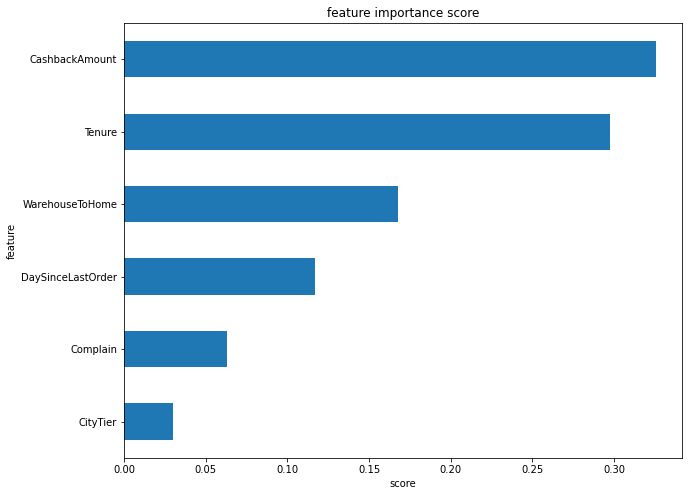

In [130]:
show_feature_importance(model)

Feature yang mempunyai pengaruh besar adalah:
- CashbackAmount
- Tenure
- WarehouseToHome
- DaySinceLastOrder

Melihat dari feature-feature yang penting diatas dapat ditarik kesimpulan bahwa, untuk mencegah terjadinya customer churn, pelanggan butuh diberikan Cashback yang cukup besar sampai setidaknya 10 bulan (10 bulan disini merupakan median dimana customer diprediksi tidak churn, customer diprediksi churn jika tenure dibawah 1 bulan). Hal ini dapat kita tarik sebagai kesimpulan karena terlihat CashbackAmount dan Tenure merupakan feature yang paling berpengaruh pada churn customer. Selain itu jumlah warehouse juga perlu diperbanyak di tempat yang memiliki banyak customer, karena warehouse yang terlalu jauh menyebabkan customer churn. Dan yang terakhir adalah harus menjaga DaySinceLastOrder yang stabil, jika customer terlalu sering atau terlalu jarang menggunakan Ecommerce ini, maka customer tersebut akan berpotensi churn karena itulah customer perlu diberikan voucher mingguan yang membuat belanja mereka teratur setiap minggunya.

# Feature Selection berdasarkan feature yang terpenting

In [135]:
X_train_selection = X_train.drop(['CityTier'], axis = 1)
X_test_selection = X_test.drop(['CityTier'], axis = 1)

## Dengan hyperparameter sebelumnya

In [136]:
model = RandomForestClassifier(bootstrap = False, max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 2000, random_state = 42)
model.fit(X_train_selection, y_train )
ypred = model.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, ypred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, ypred)}')

Recall Score = 0.7243243243243244
ROC_AUC Score = 0.8456903236924491


## Mencari Hyperparameter baru

In [137]:
print(f'Random Forest:')
RSCV = RandomizedSearchCV(RandomForestClassifier(random_state = 42), p, cv = 3, n_jobs = -1, verbose = 0, scoring = ['recall', 'roc_auc'], random_state = 42, refit = 'recall', n_iter = 10)
RSCV.fit(X_train_selection, y_train)
y_pred = RSCV.predict(X_test_selection)
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'ROC_AUC Score = {roc_auc_score(y_test, y_pred)}')

Random Forest:
Recall Score = 0.7243243243243244
ROC_AUC Score = 0.8456903236924491


In [138]:
RSCV.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

Feature selection menurunkan score model karena feature yang ada sebelumnya sudah sedikit namun feature selection membuatnya menjadi lebih sedikit lagi. Feature-feature yang masih mempunyai pengaruh walaupun tidak banyak menjadi hilang, karena itulah score model menjadi menurun